In [1]:
import matplotlib.pyplot as plt
import scipy.io
from scipy.sparse import coo_matrix
from scipy import stats
import numpy as np
import pandas as pd
import os, re

In [2]:
data_dir = '/Users/6j9/projects/human_mouse_skin/data/bam'

In [3]:
author_dirs = []
authors = os.listdir(data_dir)
for author in authors:
    mtx_dirs = []
    for r, d, f in os.walk(os.path.join(data_dir, author)):
        for file in f:
            if 'matrix' in file and 'filtered' in r:
                mtx_dirs.append(r)
    author_dirs.append(mtx_dirs)

# Mitochondrial Expression

In [4]:
all_pcts = []
for i, author_dir in enumerate(author_dirs):
    print(authors[i])
    genes_path = os.path.join(author_dir[0], 'features.tsv')
    genes = pd.read_csv(genes_path, sep='\t', header=None, index_col=None).iloc[:, 1].values
    genes = [gene.lower() for gene in genes]
    mt_genes = []
    for gene in genes:
        if re.match('^mt-', gene):
            mt_genes.append(gene)
    author_pcts = []
    for dir in author_dir:
        mtx = scipy.io.mmread(os.path.join(dir, 'matrix.mtx')).tocsr()
        genes_path = os.path.join(dir, 'features.tsv')
        genes = pd.read_csv(genes_path, sep='\t', header=None, index_col=None).iloc[:, 1].values
        genes = [gene.lower() for gene in genes]
        umi_counts_by_cell = np.sum(mtx, axis=0)
        mt_idx = [gene in mt_genes for gene in genes]
        mt_idx = np.nonzero(mt_idx)[0]
        mt_counts_by_cell = np.sum(mtx[mt_idx], axis=0)
        mt_pct_by_cell = mt_counts_by_cell / umi_counts_by_cell
        author_pcts.append(np.squeeze(np.array(mt_pct_by_cell)))
    all_pcts.append(author_pcts)

reynolds
he
hughes
leyva-castillo
ko


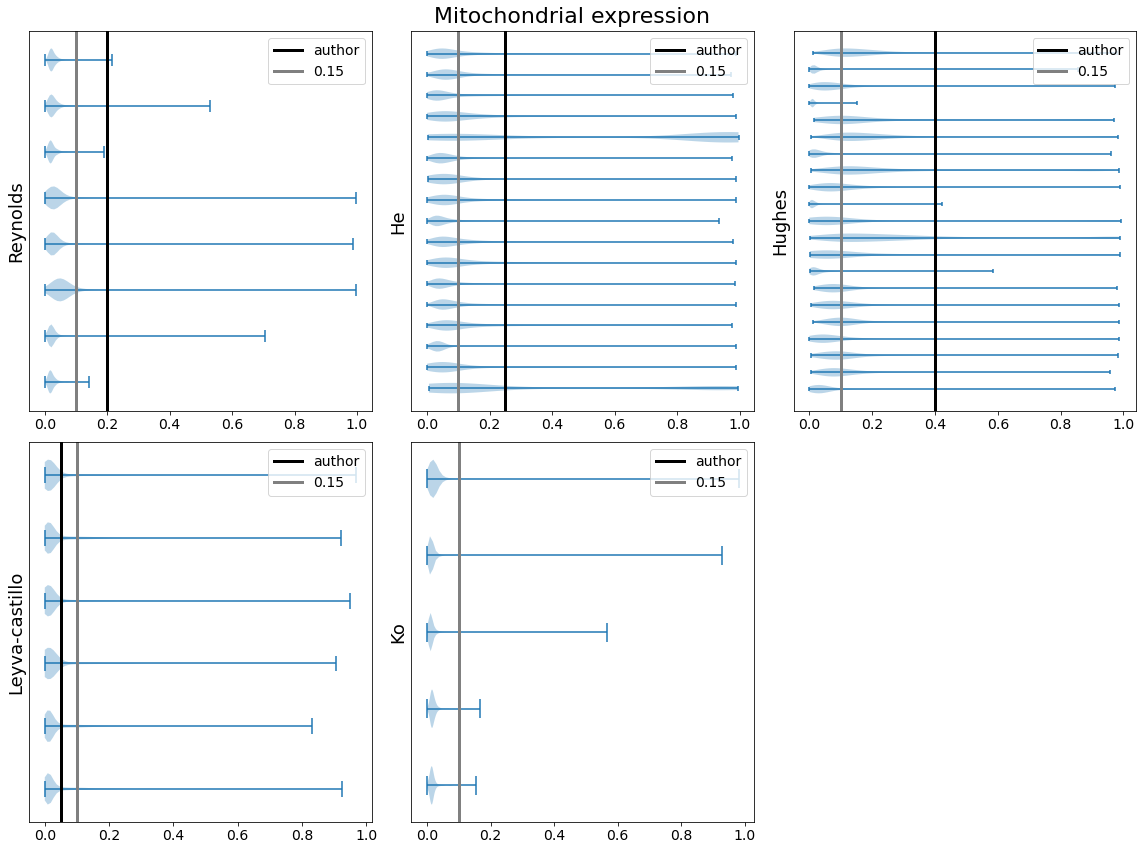

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = [ax for sublist in axes for ax in sublist]
fig.delaxes(axes[-1])
axes = axes[:-1]
for i, ax in enumerate(axes):
    data = all_pcts[i]
    ax.violinplot(data, vert=False)
    ax.set_yticks([])
    ax.set_ylabel(authors[i].capitalize(), size=18)
    x = np.arange(0, 1.1, 0.2)
    ax.set_xticks(x)
    ax.set_xticklabels([str(n)[:3] for n in x], size=14)
    if 'leyva' in authors[i]:
        ax.axvline(x=0.05, color='black', label='author', linewidth=3)
    elif 'he' == authors[i]:
        ax.axvline(x=0.25, color='black', label='author', linewidth=3)
    elif 'reynolds' in authors[i]:
        ax.axvline(x=0.20, color='black', label='author', linewidth=3)
    elif 'ko' in authors[i]:
        ax.axvline(x=0.10, color='black', label='author', linewidth=3)
    elif 'hughes' in authors[i]:
        ax.axvline(x=0.40, color='black', label='author', linewidth=3)
    ax.axvline(x=0.10, color='grey', label='0.15', linewidth=3)
    ax.legend(fontsize=14)
    
fig.suptitle('Mitochondrial expression', size=22)
plt.tight_layout()
    
out_path = '/Users/6j9/projects/human_mouse_skin/plots/preprocessing/mito_violins.png'
plt.savefig(out_path, dpi=300)
plt.show()

### Get sample names for samples with questionable distributions

In [18]:
author_check = ['he', 'hughes']
samples = {}
for i, author in enumerate(authors):
    samples[author] = []
    #if author in author_check:
    if True:
        print(author)
        for dir in author_dirs[i]:
            if author != 'reynolds':
                sample_name = re.search(f'{author}\/(SRR\d+)\_', dir).groups(1)[0]
            else:
                sample_name = re.search(f'{author}\/(SKN\d+)\_', dir).groups(1)[0]
            samples[author].append(sample_name)
            print(sample_name)

reynolds
SKN8090566
SKN8090567
SKN8090564
SKN8090565
SKN8090563
SKN8090562
SKN8090561
SKN8090560
he
SRR11396171
SRR11396170
SRR11396166
SRR11396167
SRR11396159
SRR11396161
SRR11396160
SRR11396165
SRR11396164
SRR11396172
SRR11396173
SRR11396175
SRR11396174
SRR11396168
SRR11396169
SRR11396162
SRR11396163
hughes
SRR12314757
SRR12314756
SRR12314763
SRR12314762
SRR12314751
SRR12314764
SRR12314765
SRR12314747
SRR12314746
SRR12314760
SRR12314761
SRR12314754
SRR12314755
SRR12314749
SRR12314748
SRR12314745
SRR12314759
SRR12314758
SRR12314766
SRR12314753
SRR12314752
leyva-castillo
SRR17717572
SRR17717573
SRR17717568
SRR17717569
SRR17717571
SRR17717570
ko
SRR14253415
SRR14253414
SRR14253412
SRR14253413
SRR14253416


In [22]:
print(samples['hughes'][0])
print(samples['hughes'][4])
print(samples['hughes'][5])
print(samples['hughes'][7])
print(samples['hughes'][8])
print(samples['hughes'][10])
print(samples['hughes'][11])
print(samples['hughes'][12])
print(samples['hughes'][14])
print(samples['hughes'][15])
print(samples['hughes'][16])
print(samples['hughes'][18])
print(samples['hughes'][19])

SRR12314757
SRR12314751
SRR12314764
SRR12314747
SRR12314746
SRR12314761
SRR12314754
SRR12314755
SRR12314748
SRR12314745
SRR12314759
SRR12314766
SRR12314753


In [23]:
print(samples['he'][3])
print(samples['he'][16])

SRR11396167
SRR11396163


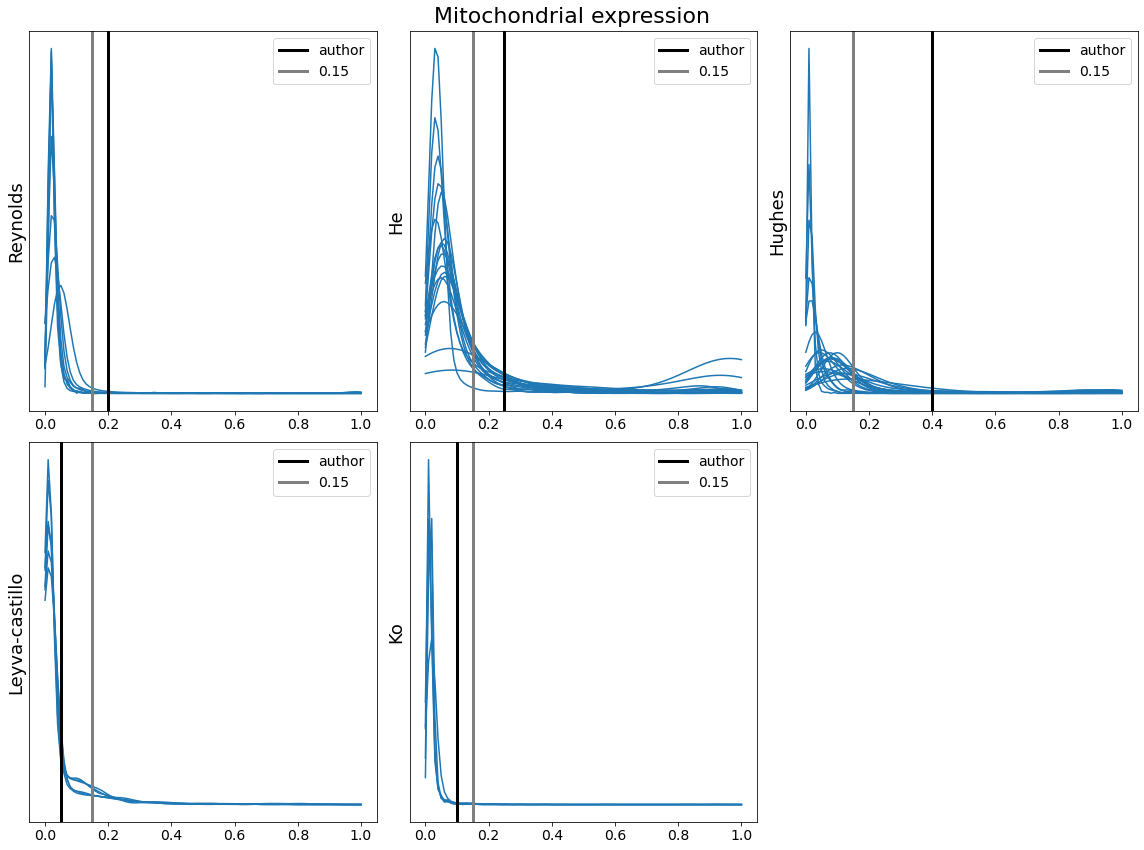

In [290]:
cmap = plt.get_cmap('tab10')

fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = [ax for sublist in axes for ax in sublist]
fig.delaxes(axes[-1])
axes = axes[:-1]
for i, ax in enumerate(axes):
    data = all_pcts[i]
    x = np.arange(0, 1.01, 0.01)
    for sample in data:
        density = stats.kde.gaussian_kde(sample)
        ax.plot(x, density(x), color=cmap(0))
    ax.set_yticks([])
    ax.set_ylabel(authors[i].capitalize(), size=18)
    xticks = np.arange(0, 1.1, 0.2)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(x)[:3] for x in xticks], size=14)
    if 'leyva' in authors[i]:
        ax.axvline(x=0.05, color='black', label='author', linewidth=3)
    elif 'he' == authors[i]:
        ax.axvline(x=0.25, color='black', label='author', linewidth=3)
    elif 'reynolds' in authors[i]:
        ax.axvline(x=0.20, color='black', label='author', linewidth=3)
    elif 'ko' in authors[i]:
        ax.axvline(x=0.10, color='black', label='author', linewidth=3)
    elif 'hughes' in authors[i]:
        ax.axvline(x=0.40, color='black', label='author', linewidth=3)
    ax.axvline(x=0.15, color='grey', label='0.15', linewidth=3)
    ax.legend(fontsize=14)

    
fig.suptitle('Mitochondrial expression', size=22)
plt.tight_layout()
    
out_path = '/Users/6j9/projects/human_mouse_skin/plots/preprocessing/mito_kde.png'
plt.savefig(out_path, dpi=300)
plt.show()

# UMI counts

In [274]:
all_counts = []
umi_max = 0
umi_min = 100000
for i, author_dir in enumerate(author_dirs):
    print(authors[i])
    author_counts = []
    for dir in author_dir:
        mtx = scipy.io.mmread(os.path.join(dir, 'matrix.mtx')).tocsr()
        genes_path = os.path.join(dir, 'features.tsv')
        genes = pd.read_csv(genes_path, sep='\t', header=None, index_col=None).iloc[:, 1].values
        genes = [gene.lower() for gene in genes]
        umi_counts_by_cell = np.sum(mtx, axis=0)
        umi_counts_by_cell = np.squeeze(np.array(umi_counts_by_cell))
        if max(umi_counts_by_cell) > umi_max:
            umi_max = max(umi_counts_by_cell)
        if min(umi_counts_by_cell) < umi_min:
            umi_min = min(umi_counts_by_cell)
        author_counts.append(umi_counts_by_cell)
    all_counts.append(author_counts)

reynolds
he
hughes
leyva-castillo
ko


In [275]:
print(f'umi max: {umi_max}')
print(f'umi min: {umi_min}')

umi max: 147643
umi min: 187


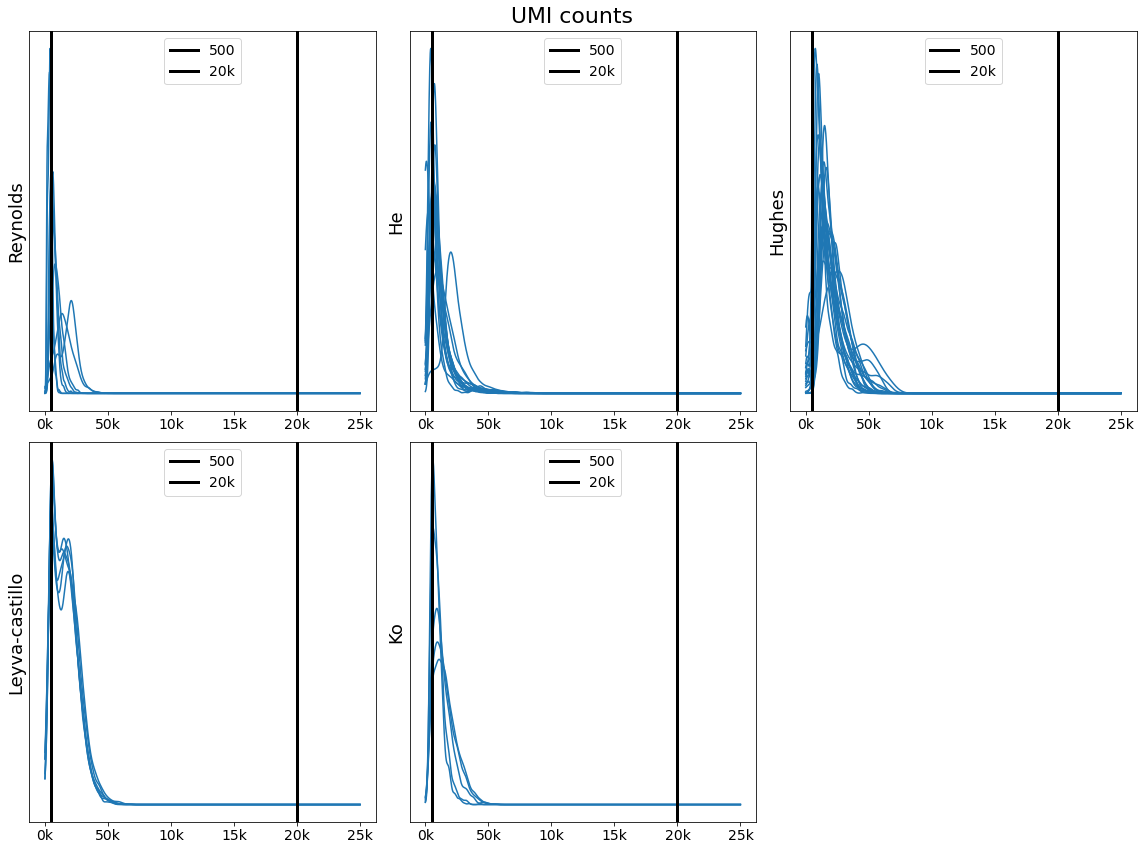

In [306]:
upper = 25000
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = [ax for sublist in axes for ax in sublist]
fig.delaxes(axes[-1])
axes = axes[:-1]
x = np.arange(0, upper, 10)
for i, ax in enumerate(axes):
    data = all_counts[i]
    for sample in data:
        density = stats.kde.gaussian_kde(sample)
        ax.plot(x, density(x), color=cmap(0))
    ax.axvline(x=500, color='black', label='500', linewidth=3)
    ax.axvline(x=20000, color='black', label='20k', linewidth=3)
    ax.legend(fontsize=14)
    ax.set_yticks([])
    ax.set_ylabel(authors[i].capitalize(), size=18)
    xticks = np.arange(0, upper + 5000, 5000)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(x)[:2] + 'k' for x in xticks], size=14)

    
fig.suptitle('UMI counts', size=22)
plt.tight_layout()
    
out_path = '/Users/6j9/projects/human_mouse_skin/plots/preprocessing/umi_counts.png'
plt.savefig(out_path, dpi=300)
plt.show()

# Unique Genes

In [282]:
all_counts = []
for i, author_dir in enumerate(author_dirs):
    print(authors[i])
    author_counts = []
    for dir in author_dir:
        mtx = scipy.io.mmread(os.path.join(dir, 'matrix.mtx')).tocsr()
        genes_path = os.path.join(dir, 'features.tsv')
        genes = pd.read_csv(genes_path, sep='\t', header=None, index_col=None).iloc[:, 1].values
        genes = [gene.lower() for gene in genes]
        uniq_genes_by_cell = mtx.astype(bool).sum(axis=0)
        author_counts.append(np.squeeze(np.array(uniq_genes_by_cell)))
    all_counts.append(author_counts)

reynolds
he
hughes
leyva-castillo
ko


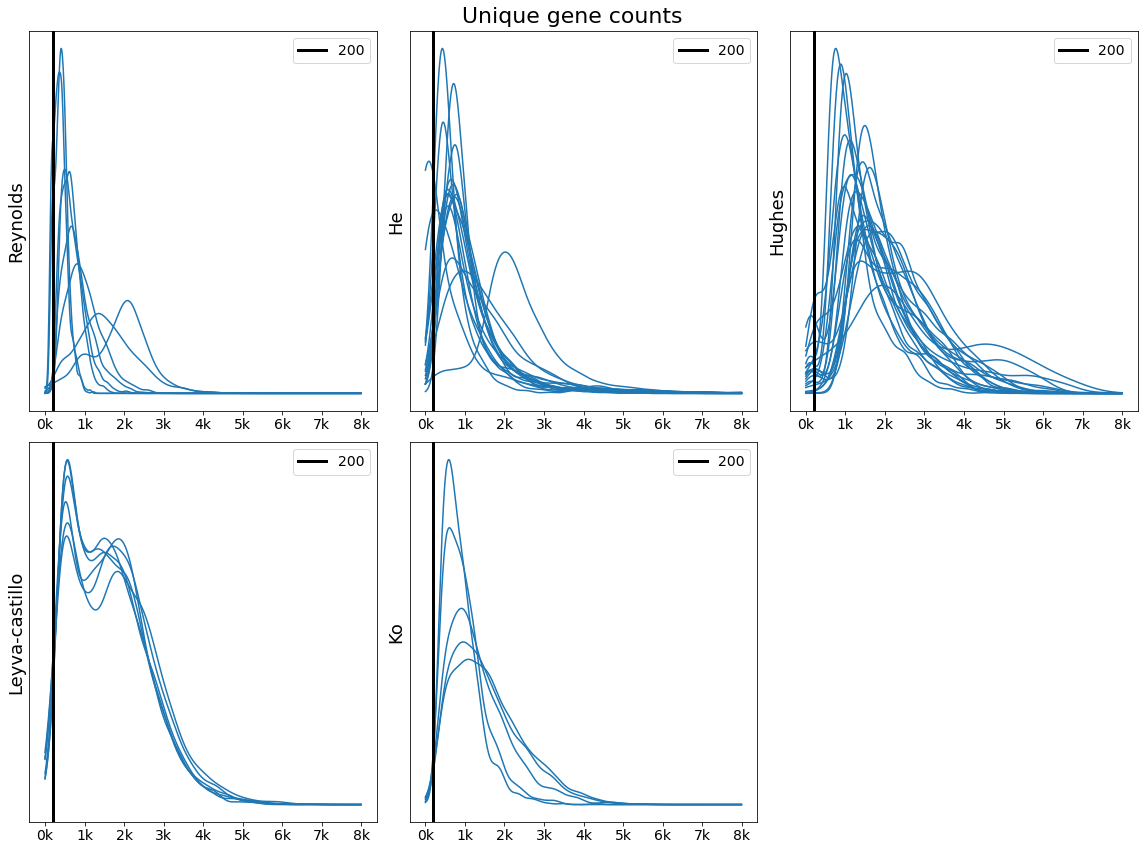

In [305]:
upper = 8000
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = [ax for sublist in axes for ax in sublist]
fig.delaxes(axes[-1])
axes = axes[:-1]
x = np.arange(0, upper, 10)
for i, ax in enumerate(axes):
    data = all_counts[i]
    for sample in data:
        density = stats.kde.gaussian_kde(sample)
        ax.plot(x, density(x), color=cmap(0))
    ax.set_yticks([])
    ax.set_ylabel(authors[i].capitalize(), size=18)
    xticks = np.arange(0, upper + 1000, 1000)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(x)[:1] + 'k' for x in xticks], size=14)
    ax.axvline(x=200, color='black', label='200', linewidth=3)
    ax.legend(fontsize=14)
    
fig.suptitle('Unique gene counts', size=22)
plt.tight_layout()
    
out_path = '/Users/6j9/projects/human_mouse_skin/plots/preprocessing/uniq_gene_counts.png'
plt.savefig(out_path, dpi=300)
plt.show()